##Keras Functional API Example: Fashion MNIST Dataset

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print("train has", dict(zip(unique, counts)))

train has {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
print("test has", dict(zip(unique, counts)))

test has {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


[9 6 3 0 8 3 8 6 9 9 0 9 4 1 1 4 8 0 0 3 1 4 6 8 6]


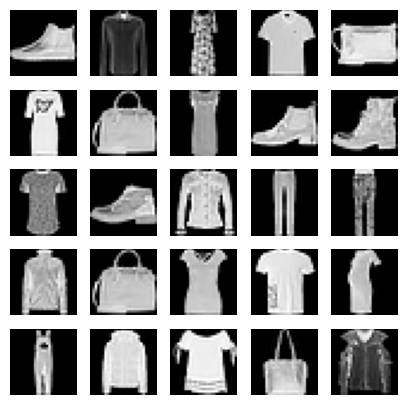

In [ ]:
indices = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indices]
labels = y_train[indices]
print(labels)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
for i in range(len(indices)):
  plt.subplot(5,5, i+1)
  image = images[i]

  plt.imshow(image, cmap='gray')
  plt.axis('off')

In [ ]:
for i in labels:
  print(class_names[i])

Ankle Boot
Shirt
Dress
T-shirt/top
Bag
Dress
Bag
Shirt
Ankle Boot
Ankle Boot
T-shirt/top
Ankle Boot
Coat
Trouser
Trouser
Coat
Bag
T-shirt/top
T-shirt/top
Dress
Trouser
Coat
Shirt
Bag
Shirt


In [ ]:
input_shape = (X_train.shape[1:]+(1,))
num_classes = len(np.unique(y_train))
num_classes

10

In [ ]:
input_shape

(28, 28, 1)

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
input = keras.layers.Input(shape=input_shape)
batchnorm = keras.layers.BatchNormalization()(input)
layer1 = keras.layers.Dense(units=128, activation='relu')(batchnorm)
dropout1 = keras.layers.Dropout(0.2)(layer1)
layer2 = keras.layers.Dense(units=128, activation='relu')(dropout1)
dropout2 = keras.layers.Dropout(0.2)(layer2)
flatten = keras.layers.Flatten()(dropout2)
layer3 = keras.layers.Dense(units=128, activation='relu')(flatten)
layer4 = keras.layers.Dense(units=128, activation='relu')(layer3)
output = keras.layers.Dense(units=num_classes, activation='softmax')(layer4)
model = keras.Model(inputs=[input], outputs=[output])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 1)        4         
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 28, 28, 128)       256       
                                                                 
 dropout_2 (Dropout)         (None, 28, 28, 128)       0         
                                                                 
 dense_6 (Dense)             (None, 28, 28, 128)       16512     
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 128)       0         
                                                           

In [ ]:
BATCH_SIZE = 64
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
np.expand_dims(X_train, -1).shape

(60000, 28, 28, 1)

In [ ]:
model.fit(np.expand_dims(X_train, -1), y_train, epochs=5, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/5
 26/750 [>.............................] - ETA: 7:29 - loss: 1.3595 - accuracy: 0.5361

In [ ]:
model.predict(X_test[indices])